In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

oecd_bli = pd.read_csv("datasets/bli_2015.csv", thousands=",")
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
gdp_per_capita = pd.read_csv("datasets/gdp_capita_2015.csv", sep=";", thousands=",")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [6]:
country_stats
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

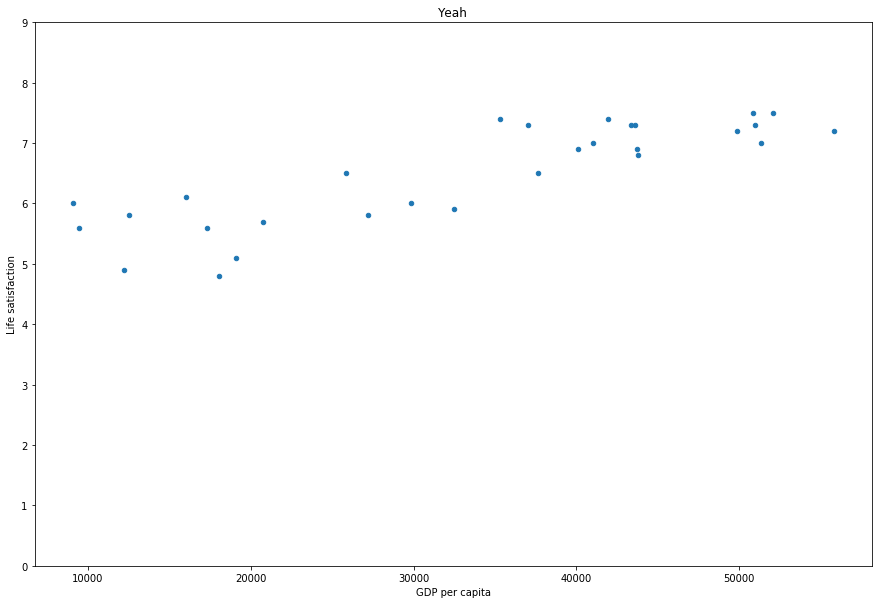

In [7]:
country_stats.plot(kind='scatter',x="GDP per capita", y='Life satisfaction',ylim=(0,9),title="Yeah",figsize=(15,10))
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=22)
model.fit(X, y)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=22, p=2,
          weights='uniform')

In [21]:
X_new = [[22587]]
print(model.predict(X_new))

[[6.26363636]]
